# Task 2 Overview: Quantitative Analysis Using PyNance and TA-Lib
This task focuses on performing quantitative analysis of stock price data using financial libraries such as TA-Lib (Technical Analysis Library) and PyNance. The goal is to analyze stock price data by calculating various financial metrics and technical indicators, visualizing these indicators, and understanding their impact on stock price movements. Here's a detailed breakdown of what each part entails:
- Use Additional Finance Data
- Load and Prepare the Data
- Apply Analysis Indicators with TA-Lib
- Use PyNance for Financial Metrics
- Plot the stock price data along with the calculated indicators (e.g., plot the closing price along with the moving average).
- Create visualizations to highlight the effects of various technical indicators on the stock price.
- Visualize trends, correlations, and any anomalies in the data.

In [2]:
import pandas as pd
import talib
import yfinance as yf
import matplotlib.pyplot as plt


In [5]:
import sys 
sys.path.append('../scripts')
from eda_functions import load_data

In [30]:
#Define file paths
data_folder = '../data'
csv_files = ['AAPL_historical_data.csv', 'AMZN_historical_data.csv', 'GOOG_historical_data.csv', 'META_historical_data.csv',
             'MSFT_historical_data.csv', 'NVDA_historical_data.csv','TSLA_historical_data.csv']


In [31]:
# Load CSV data
dfs = {}
for file_name in csv_files:
    dfs[file_name] = load_data(file_name)



In [32]:
#b Display basic information for each DataFrame
for file_name, df in dfs.items():
    print(f"--- {file_name} ---")
    print("Head of the DataFrame:")
    display(df.head(3))
    
    print("DataFrame Info:")
    df.info()
    
    print("Describe DataFrame:")
    display(df.describe(include='all'))
    
    print("\n\n")


--- AAPL_historical_data.csv ---
Head of the DataFrame:


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10998 entries, 0 to 10997
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          10998 non-null  object 
 1   Open          10998 non-null  float64
 2   High          10998 non-null  float64
 3   Low           10998 non-null  float64
 4   Close         10998 non-null  float64
 5   Adj Close     10998 non-null  float64
 6   Volume        10998 non-null  int64  
 7   Dividends     10998 non-null  float64
 8   Stock Splits  10998 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 773.4+ KB
Describe DataFrame:


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,10998,10998.000000,10998.000000,10998.000000,10998.000000,10998.000000,1.099800e+04,10998.000000,10998.000000
unique,10998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1980-12-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,22.299160,22.539055,22.068367,22.312754,21.494496,3.180806e+08,0.000752,0.001546
std,NaN,46.003685,46.496031,45.540929,46.037660,45.561916,3.354523e+08,0.011753,0.083663
min,NaN,0.049665,0.049665,0.049107,0.049107,0.037857,0.000000e+00,0.000000,0.000000
25%,NaN,0.299107,0.303710,0.290179,0.298549,0.241840,1.132545e+08,0.000000,0.000000
50%,NaN,0.531250,0.537946,0.522321,0.531250,0.432079,2.057412e+08,0.000000,0.000000
75%,NaN,20.204196,20.389554,19.998036,20.196160,17.253029,3.985275e+08,0.000000,0.000000





--- AMZN_historical_data.csv ---
Head of the DataFrame:


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6846 entries, 0 to 6845
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          6846 non-null   object 
 1   Open          6846 non-null   float64
 2   High          6846 non-null   float64
 3   Low           6846 non-null   float64
 4   Close         6846 non-null   float64
 5   Adj Close     6846 non-null   float64
 6   Volume        6846 non-null   int64  
 7   Dividends     6846 non-null   float64
 8   Stock Splits  6846 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 481.5+ KB
Describe DataFrame:


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,6846,6846.000000,6846.000000,6846.000000,6846.000000,6846.000000,6.846000e+03,6846.0,6846.000000
unique,6846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1997-05-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,37.360464,37.801009,36.882561,37.351096,37.351096,1.380713e+08,0.0,0.003944
std,NaN,53.756955,54.366449,53.087051,53.729913,53.729913,1.382346e+08,0.0,0.246789
min,NaN,0.070313,0.072396,0.065625,0.069792,0.069792,9.744000e+06,0.0,0.000000
25%,NaN,2.070125,2.120625,2.040156,2.076750,2.076750,6.505442e+07,0.0,0.000000
50%,NaN,8.574500,8.666750,8.466500,8.591500,8.591500,1.020650e+08,0.0,0.000000
75%,NaN,50.453876,50.723249,50.059875,50.426500,50.426500,1.567560e+08,0.0,0.000000





--- GOOG_historical_data.csv ---
Head of the DataFrame:


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216,0.0,0.0
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488,0.0,0.0
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939,0.0,0.0


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5020 non-null   object 
 1   Open          5020 non-null   float64
 2   High          5020 non-null   float64
 3   Low           5020 non-null   float64
 4   Close         5020 non-null   float64
 5   Adj Close     5020 non-null   float64
 6   Volume        5020 non-null   int64  
 7   Dividends     5020 non-null   float64
 8   Stock Splits  5020 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 353.1+ KB
Describe DataFrame:


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,5020,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5.020000e+03,5020.000000,5020.000000
unique,5020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2004-08-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,45.251315,45.728793,44.800587,45.274515,45.224493,1.157539e+08,0.000040,0.004583
std,NaN,43.338635,43.818298,42.918167,43.377299,43.332534,1.497936e+08,0.002823,0.284034
min,NaN,2.470490,2.534002,2.390042,2.490913,2.488082,1.584340e+05,0.000000,0.000000
25%,NaN,13.034705,13.145415,12.881592,13.032090,13.017277,2.733950e+07,0.000000,0.000000
50%,NaN,26.982210,27.194902,26.791387,27.005927,26.975230,5.585480e+07,0.000000,0.000000
75%,NaN,60.215126,60.758375,59.811811,60.280252,60.211734,1.425333e+08,0.000000,0.000000





--- META_historical_data.csv ---
Head of the DataFrame:


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2012-12-12,28.00,28.139999,27.370001,27.580000,27.523441,46704200,0.0,0.0
1,2012-12-13,27.59,28.750000,27.430000,28.240000,28.182087,81051600,0.0,0.0
2,2012-12-14,28.18,28.330000,26.760000,26.809999,26.755020,91631600,0.0,0.0


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2926 entries, 0 to 2925
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2926 non-null   object 
 1   Open          2926 non-null   float64
 2   High          2926 non-null   float64
 3   Low           2926 non-null   float64
 4   Close         2926 non-null   float64
 5   Adj Close     2926 non-null   float64
 6   Volume        2926 non-null   int64  
 7   Dividends     2926 non-null   float64
 8   Stock Splits  2926 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 205.9+ KB
Describe DataFrame:


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,2926,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2.926000e+03,2926.000000,2926.0
unique,2926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2012-12-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,179.557215,181.875331,177.317761,179.649453,179.305921,2.872083e+07,0.000342,0.0
std,NaN,108.864895,110.256219,107.511134,108.906971,108.755055,2.269811e+07,0.013070,0.0
min,NaN,22.990000,23.090000,22.670000,22.900000,22.853037,5.467500e+06,0.000000,0.0
25%,NaN,97.767502,98.772499,95.889997,97.382498,97.182795,1.571308e+07,0.000000,0.0
50%,NaN,166.870003,168.850006,164.210007,166.855003,166.512825,2.176100e+07,0.000000,0.0
75%,NaN,231.450005,234.934998,228.687504,232.424999,231.948360,3.294468e+07,0.000000,0.0





--- MSFT_historical_data.csv ---
Head of the DataFrame:


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059946,1031788800,0.0,0.0
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062087,308160000,0.0,0.0
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063158,133171200,0.0,0.0


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9672 entries, 0 to 9671
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          9672 non-null   object 
 1   Open          9672 non-null   float64
 2   High          9672 non-null   float64
 3   Low           9672 non-null   float64
 4   Close         9672 non-null   float64
 5   Adj Close     9672 non-null   float64
 6   Volume        9672 non-null   int64  
 7   Dividends     9672 non-null   float64
 8   Stock Splits  9672 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 680.2+ KB
Describe DataFrame:


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,9672,9672.000000,9672.000000,9672.000000,9672.000000,9672.000000,9.672000e+03,9672.000000,9672.000000
unique,9672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1986-03-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,58.402199,59.003071,57.784759,58.417683,52.719365,5.677678e+07,0.002982,0.001758
std,NaN,90.122302,90.958645,89.232546,90.146786,90.066461,3.814123e+07,0.046524,0.057944
min,NaN,0.088542,0.092014,0.088542,0.090278,0.055665,2.304000e+06,0.000000,0.000000
25%,NaN,5.695313,5.770508,5.617188,5.695313,3.511695,3.206982e+07,0.000000,0.000000
50%,NaN,27.304999,27.600000,27.085000,27.341875,19.145540,4.990225e+07,0.000000,0.000000
75%,NaN,46.687500,47.099998,46.138672,46.657187,38.339042,7.071788e+07,0.000000,0.000000





--- NVDA_historical_data.csv ---
Head of the DataFrame:


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000,0.0,0.0
1,1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000,0.0,0.0
2,1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000,0.0,0.0


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6421 entries, 0 to 6420
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          6421 non-null   object 
 1   Open          6421 non-null   float64
 2   High          6421 non-null   float64
 3   Low           6421 non-null   float64
 4   Close         6421 non-null   float64
 5   Adj Close     6421 non-null   float64
 6   Volume        6421 non-null   int64  
 7   Dividends     6421 non-null   float64
 8   Stock Splits  6421 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 451.6+ KB
Describe DataFrame:


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,6421,6421.000000,6421.000000,6421.000000,6421.000000,6421.000000,6.421000e+03,6421.000000,6421.000000
unique,6421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1999-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,6.207884,6.320466,6.085095,6.207702,6.181334,6.060791e+08,0.000025,0.003348
std,NaN,16.138328,16.424862,15.794914,16.118517,16.121352,4.323482e+08,0.000316,0.142397
min,NaN,0.034896,0.035547,0.033333,0.034115,0.031291,1.968000e+07,0.000000,0.000000
25%,NaN,0.277500,0.286250,0.269500,0.276750,0.253843,3.456350e+08,0.000000,0.000000
50%,NaN,0.457250,0.464750,0.450750,0.457000,0.427637,5.070000e+08,0.000000,0.000000
75%,NaN,4.182500,4.235750,4.116500,4.175000,4.130434,7.362000e+08,0.000000,0.000000





--- TSLA_historical_data.csv ---
Head of the DataFrame:


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,0.0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,0.0,0.0


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3545 entries, 0 to 3544
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3545 non-null   object 
 1   Open          3545 non-null   float64
 2   High          3545 non-null   float64
 3   Low           3545 non-null   float64
 4   Close         3545 non-null   float64
 5   Adj Close     3545 non-null   float64
 6   Volume        3545 non-null   int64  
 7   Dividends     3545 non-null   float64
 8   Stock Splits  3545 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 249.4+ KB
Describe DataFrame:


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,3545,3545.000000,3545.000000,3545.000000,3545.000000,3545.000000,3.545000e+03,3545.0,3545.000000
unique,3545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2010-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,75.505658,77.159237,73.743492,75.487264,75.487264,9.699708e+07,0.0,0.002257
std,NaN,102.530489,104.806516,100.051787,102.456615,102.456615,7.866828e+07,0.0,0.097921
min,NaN,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06,0.0,0.000000
25%,NaN,11.516667,11.861333,11.216667,11.565333,11.565333,4.770600e+07,0.0,0.000000
50%,NaN,17.463333,17.688667,17.100000,17.459333,17.459333,8.250600e+07,0.0,0.000000
75%,NaN,161.880005,165.333328,158.360001,161.479996,161.479996,1.228890e+08,0.0,0.000000


All of the above files doesn't have any missing file.

In [33]:
def calculate_indicators_summary(df):
    """Calculate Moving Averages, RSI, MACD, Bollinger Bands, and return summary stats."""
    summary = {}
    
    # Simple Moving Averages (SMA)
    summary['SMA_50'] = df['Close'].rolling(window=50).mean().iloc[-1]
    summary['SMA_200'] = df['Close'].rolling(window=200).mean().iloc[-1]
    
    # Relative Strength Index (RSI)
    summary['RSI'] = talib.RSI(df['Close'], timeperiod=14).iloc[-1]
    
    # MACD
    macd, macd_signal, macd_hist = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
    summary['MACD'] = macd.iloc[-1]
    summary['MACD_Signal'] = macd_signal.iloc[-1]
    summary['MACD_Hist'] = macd_hist.iloc[-1]
    
    # Bollinger Bands
    upperband, middleband, lowerband = talib.BBANDS(df['Close'], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
    summary['UpperBand'] = upperband.iloc[-1]
    summary['MiddleBand'] = middleband.iloc[-1]
    summary['LowerBand'] = lowerband.iloc[-1]
    
    # Average True Range (ATR)
    summary['ATR'] = talib.ATR(df['High'], df['Low'], df['Close'], timeperiod=14).iloc[-1]
    
    return summary

In [34]:
indicator_summary_df = pd.DataFrame()

for file_name, df in dfs.items():
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    
    # Calculate indicators and get summary statistics
    summary_stats = calculate_indicators_summary(df)
    
    # Create a DataFrame row for the current stock and append to the summary DataFrame
    stock_name = file_name.split('_')[0]  # Extract stock name from file name
    summary_df = pd.DataFrame(summary_stats, index=[stock_name])
    indicator_summary_df = pd.concat([indicator_summary_df, summary_df])

# Reset index to display the stock name as a column
indicator_summary_df.reset_index(inplace=True)
indicator_summary_df.rename(columns={'index': 'Stock'}, inplace=True)

# Display the final comparison DataFrame
print(indicator_summary_df)

  Stock      SMA_50    SMA_200        RSI       MACD  MACD_Signal  MACD_Hist  \
0  AAPL  210.858600  188.91145  49.359115   2.012764     4.301163  -2.288399   
1  AMZN  187.044000  167.81315  40.408843  -2.280971    -0.994218  -1.286753   
2  GOOG  180.168600  154.02380  37.920068  -2.708091    -0.653273  -2.054818   
3  META  491.466799  431.02345  39.789373 -10.357947    -6.301008  -4.056939   
4  MSFT  439.183400  402.55780  37.080269  -5.181612    -1.272579  -3.909033   
5  NVDA  119.379500   79.57382  33.349720  -2.954132    -0.389413  -2.564719   
6  TSLA  206.113800  204.48080  48.220474   5.206237    10.490485  -5.284248   

    UpperBand  MiddleBand   LowerBand        ATR  
0  235.999799  225.117001  214.234202   5.064434  
1  205.029871  190.157500  175.285130   4.753667  
2  197.653133  182.534501  167.415869   4.021451  
3  545.736365  492.545000  439.353634  15.530780  
4  476.404456  446.118997  415.833538   8.880871  
5  137.546058  122.038000  106.529943   6.054910  
6 

# Stock Analysis Summary

We calculated several technical indicators for a selection of prominent tech stocks: **AAPL (Apple), AMZN (Amazon), GOOG (Google), META (Meta Platforms), MSFT (Microsoft), NVDA (NVIDIA), and TSLA (Tesla)**. The analysis includes **Simple Moving Averages (SMA)**, the **Relative Strength Index (RSI)**, **Moving Average Convergence Divergence (MACD)**, **Bollinger Bands**, and the **Average True Range (ATR)**. The insights are based on these indicators.

## 1. **Simple Moving Averages (SMA)**
- **SMA_50**: The 50-day simple moving average shows the short-term trend.
- **SMA_200**: The 200-day simple moving average highlights long-term trends.

The gap between **SMA_50** and **SMA_200** provides insight into the stock's momentum:
- **AAPL**: Shows a short-term uptrend, with **SMA_50** (210.86) higher than **SMA_200** (188.91).
- **AMZN, GOOG, META, MSFT**: These stocks exhibit weaker short-term momentum with their **SMA_50** closer to **SMA_200**.
- **TSLA**: Has a tight convergence between **SMA_50** and **SMA_200**, suggesting near-term price consolidation.

## 2. **Relative Strength Index (RSI)**
- **RSI** measures momentum on a scale of 0-100. Values above 70 indicate overbought conditions, while values below 30 suggest oversold conditions.

- **NVDA**: Has the lowest **RSI** (33.35), indicating it's near oversold levels, potentially signaling a buying opportunity.
- **AMZN, GOOG, META, MSFT**: These stocks have **RSI** values ranging from 37 to 40, showing weaker momentum and neutral trends.
- **AAPL**: Has an **RSI** of 49.36, indicating it's neither overbought nor oversold.
- **TSLA**: With an **RSI** of 48.22, is in a similar neutral state.

## 3. **MACD (Moving Average Convergence Divergence)**
- The **MACD** identifies changes in the strength, direction, and duration of a trend.
- **MACD_Signal**: A slower-moving average to identify buy/sell signals.
- **MACD_Hist**: The difference between **MACD** and **MACD_Signal**, representing the histogram.

### Key Observations:
- **AAPL**: Has a positive **MACD histogram** (-2.29), showing potential bullish momentum as it approaches a buy signal.
- **META, MSFT**: Show significant negative **MACD** values (-10.36 and -5.18 respectively), suggesting strong bearish momentum.
- **TSLA**: Has a positive **MACD** (5.21) but a negative histogram (-5.28), indicating some recent price declines following a positive trend.

## 4. **Bollinger Bands**
- **Bollinger Bands** consist of the **Upper Band**, **Middle Band** (which is the 20-day SMA), and **Lower Band**. They help assess price volatility.

### Observations:
- **AAPL, AMZN**: Prices are close to the middle band, indicating moderate volatility.
- **META, TSLA**: Both show a wider gap between the upper and lower bands, suggesting high volatility. **META** has the widest band range, indicating significant price fluctuation.

## 5. **Average True Range (ATR)**
- **ATR** measures market volatility by considering recent price movements. Higher **ATR** values indicate more volatility.

- **META**: Has the highest **ATR** (15.53), reflecting recent volatility.
- **TSLA**: Also has a high **ATR** (13.04), indicating significant price fluctuations.
- **AAPL, AMZN, GOOG**: Have relatively lower **ATR** values, showing more stability.

---

## **Summary of Key Findings:**
1. **AAPL**: Appears to be in a stable uptrend with moderate volatility and momentum.
2. **NVDA**: Shows signs of being oversold and may present a buying opportunity.
3. **META**: Exhibits significant volatility, suggesting caution due to its strong bearish momentum.
4. **TSLA**: Faces consolidation, and though it has recently dipped, its long-term momentum is still intact.
5. **AMZN, GOOG, MSFT**: These stocks are relatively neutral in terms of momentum but are in bearish territory based on their **MACD


In [35]:
def plot_indicators(df, stock_name):
    plt.figure(figsize=(14, 10))
    
    # Plot the Closing Price and Moving Averages
    plt.subplot(3, 1, 1)
    plt.plot(df['Close'], label=f'{stock_name} Close Price')
    plt.plot(df['SMA_50'], label=f'{stock_name} 50-Day SMA', linestyle='--')
    plt.plot(df['SMA_200'], label=f'{stock_name} 200-Day SMA', linestyle='--')
    plt.title(f'{stock_name} Stock Price and Moving Averages')
    plt.legend()

    # Plot RSI
    plt.subplot(3, 1, 2)
    plt.plot(df['RSI'], label=f'{stock_name} RSI')
    plt.axhline(70, color='red', linestyle='--', label='Overbought')
    plt.axhline(30, color='green', linestyle='--', label='Oversold')
    plt.title(f'{stock_name} Relative Strength Index (RSI)')
    plt.legend()

    # Plot MACD and Bollinger Bands
    plt.subplot(3, 1, 3)
    plt.plot(df['MACD'], label=f'{stock_name} MACD')
    plt.plot(df['MACD_Signal'], label=f'{stock_name} MACD Signal')
    plt.bar(df.index, df['MACD_Hist'], label=f'{stock_name} MACD Histogram', alpha=0.3)
    plt.title(f'{stock_name} MACD and Signal')
    plt.legend()

    plt.tight_layout()
    plt.show()



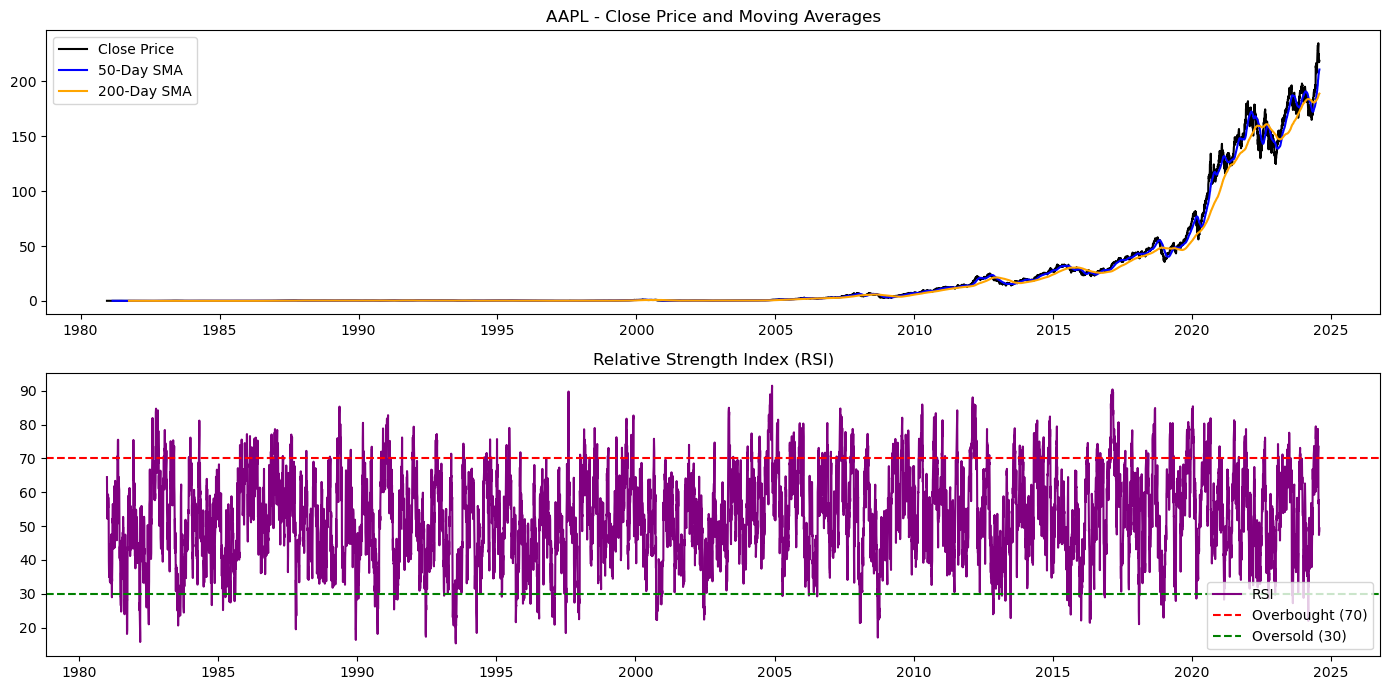

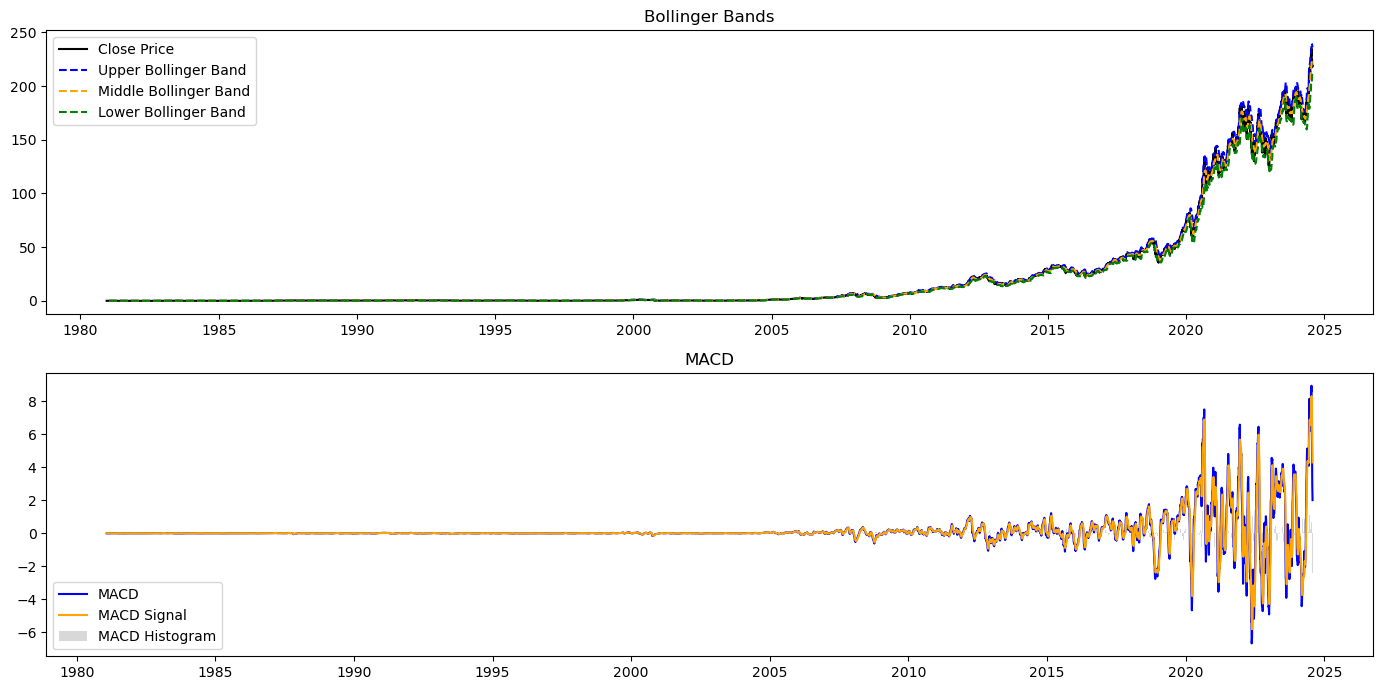

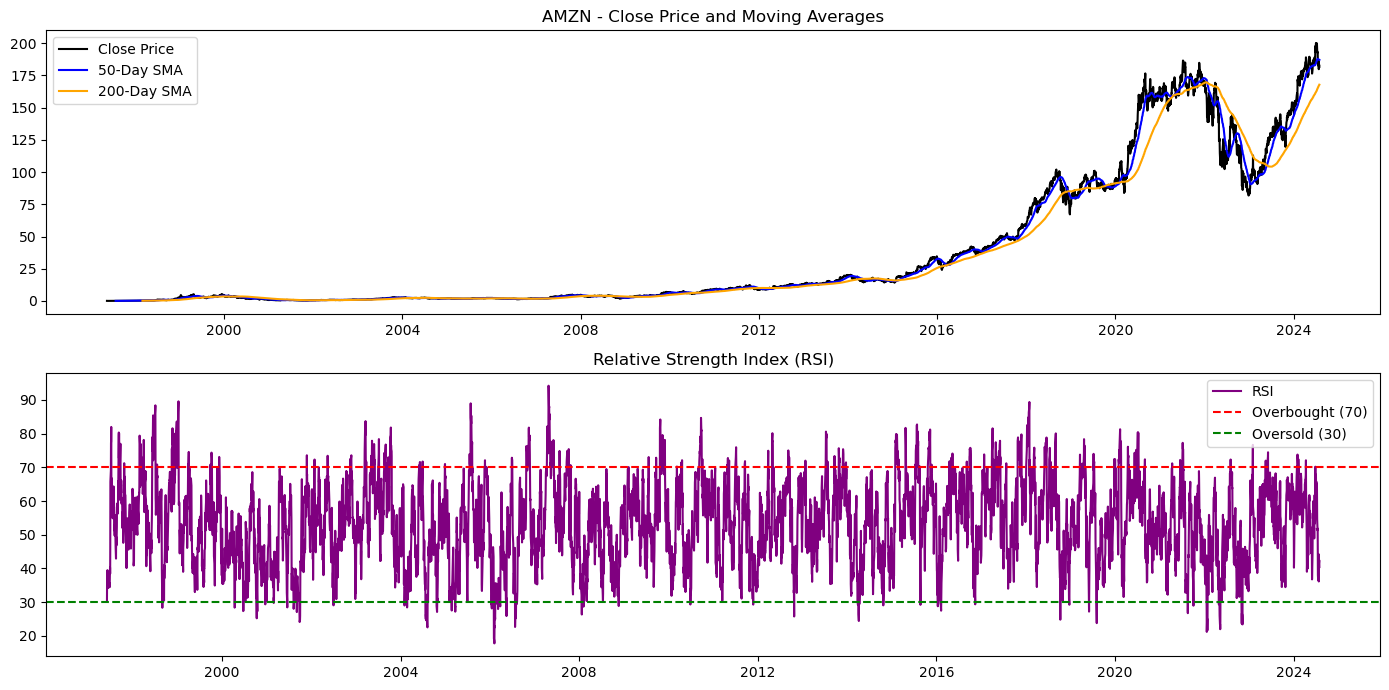

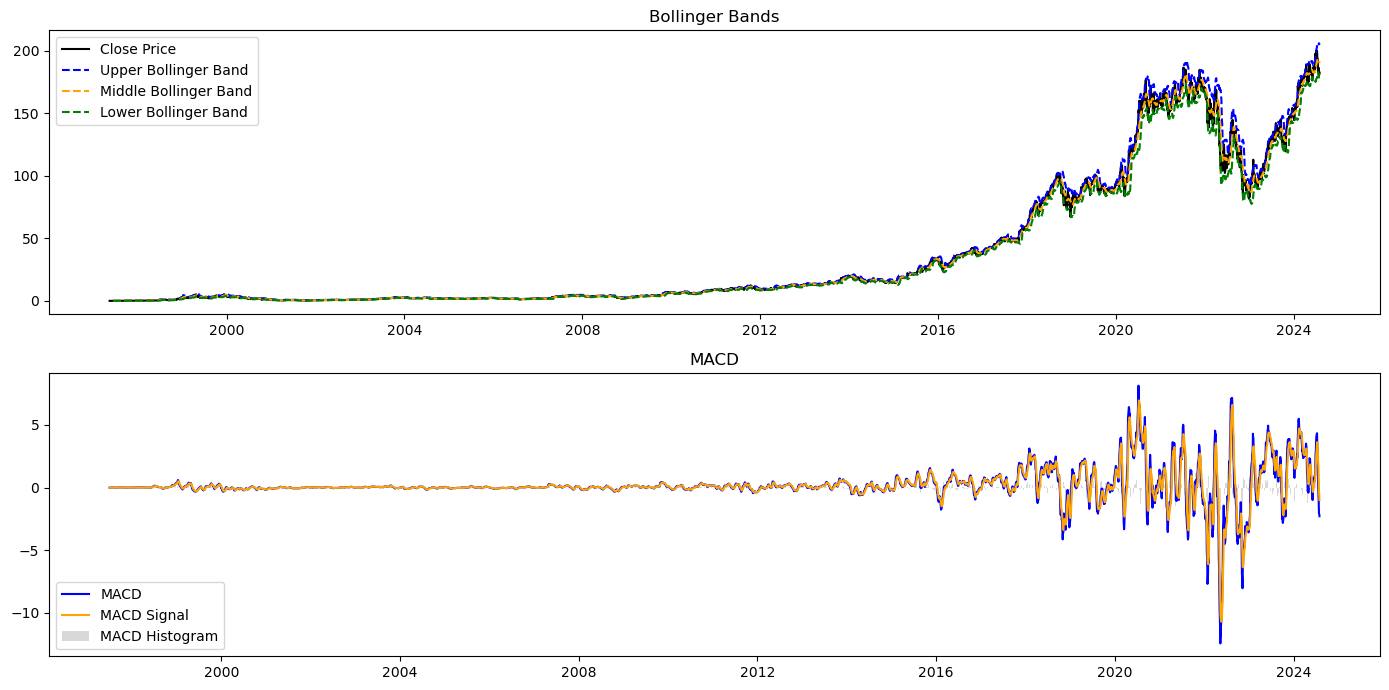

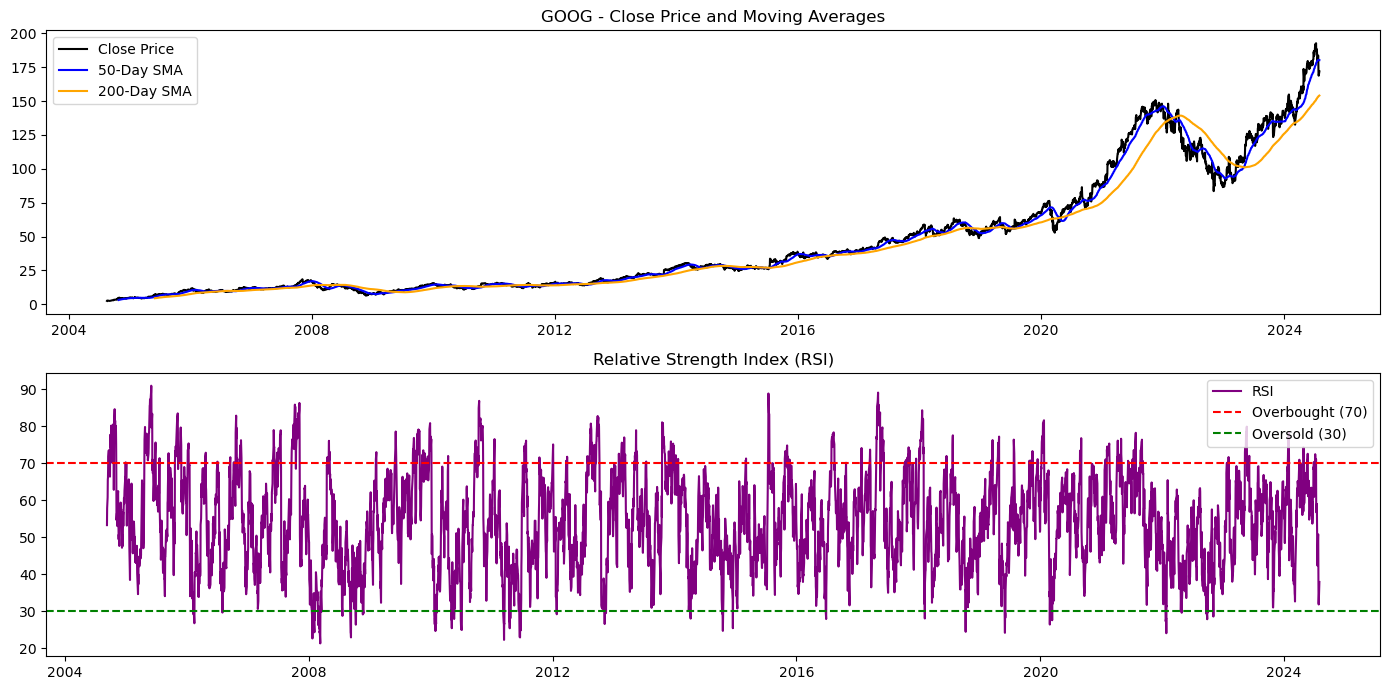

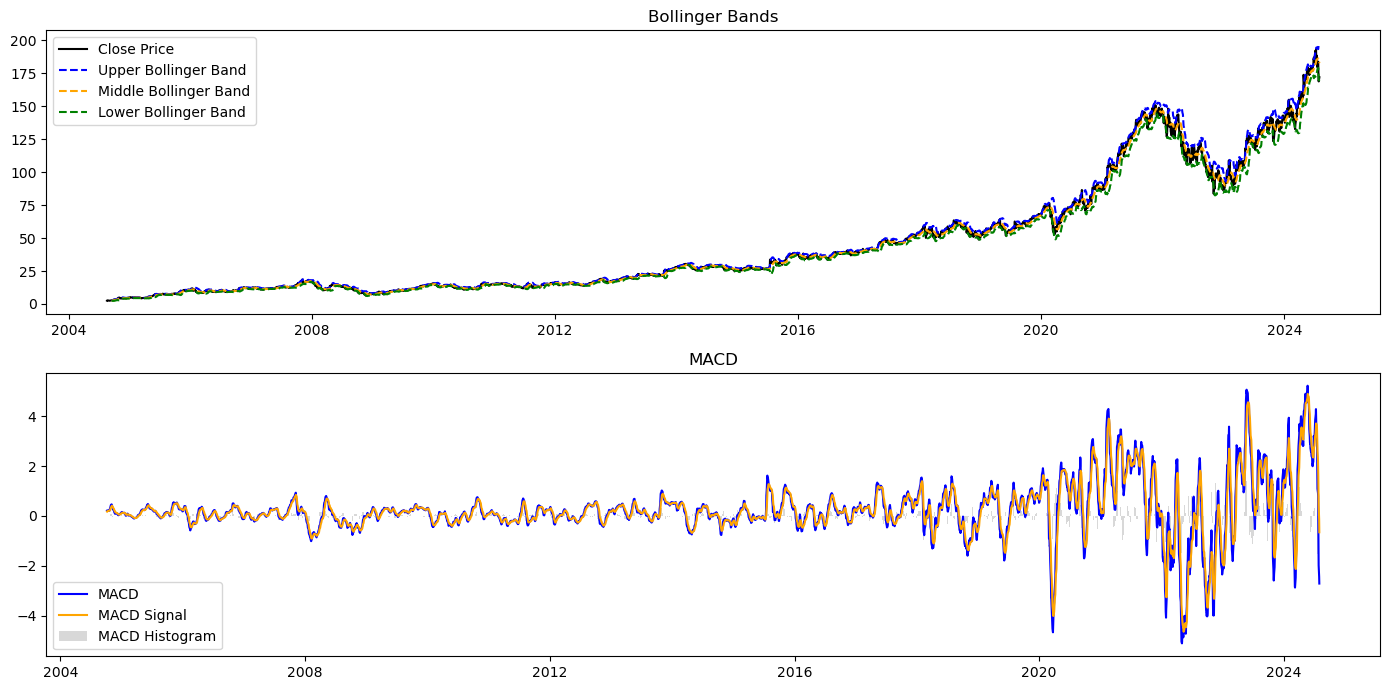

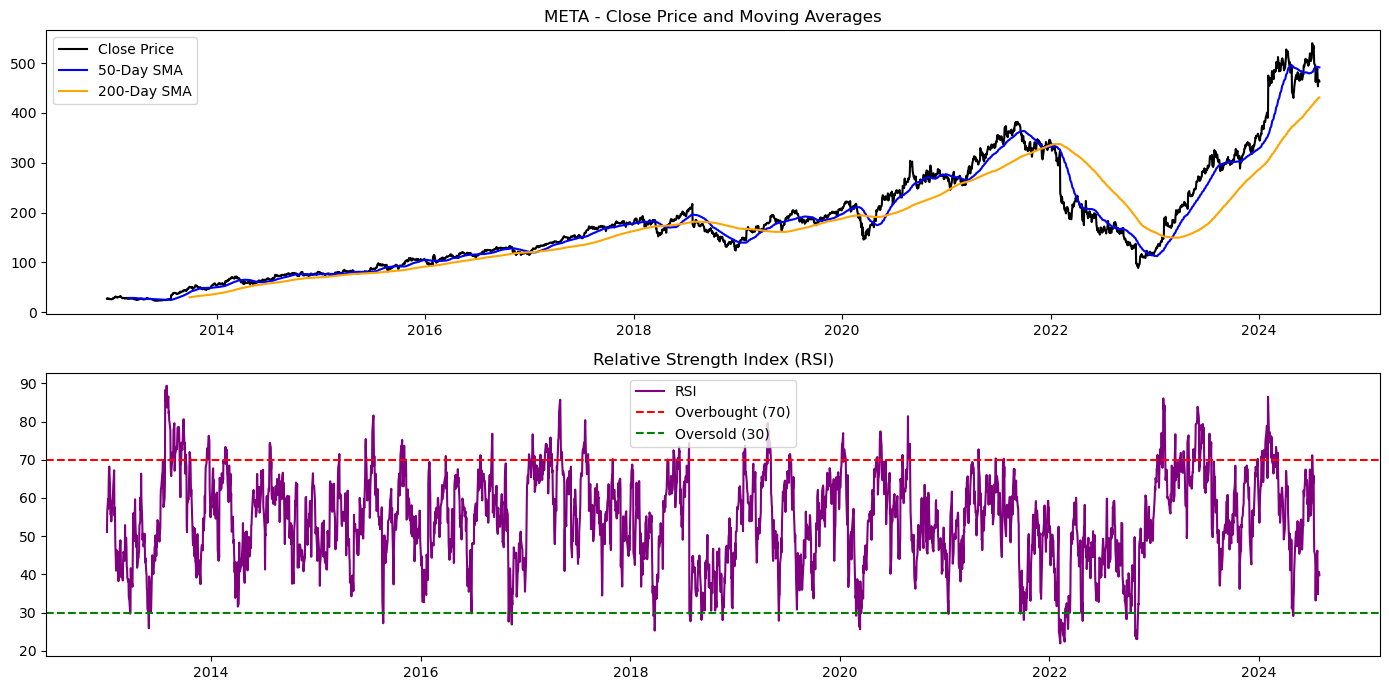

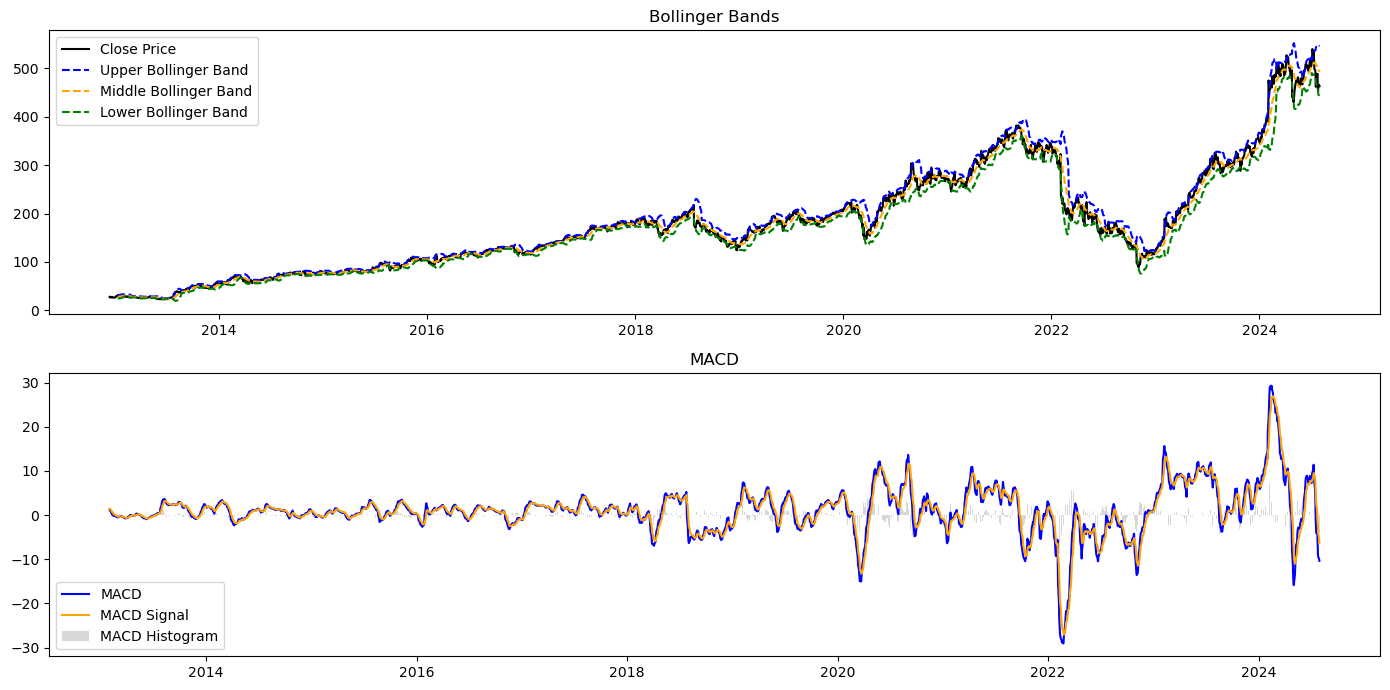

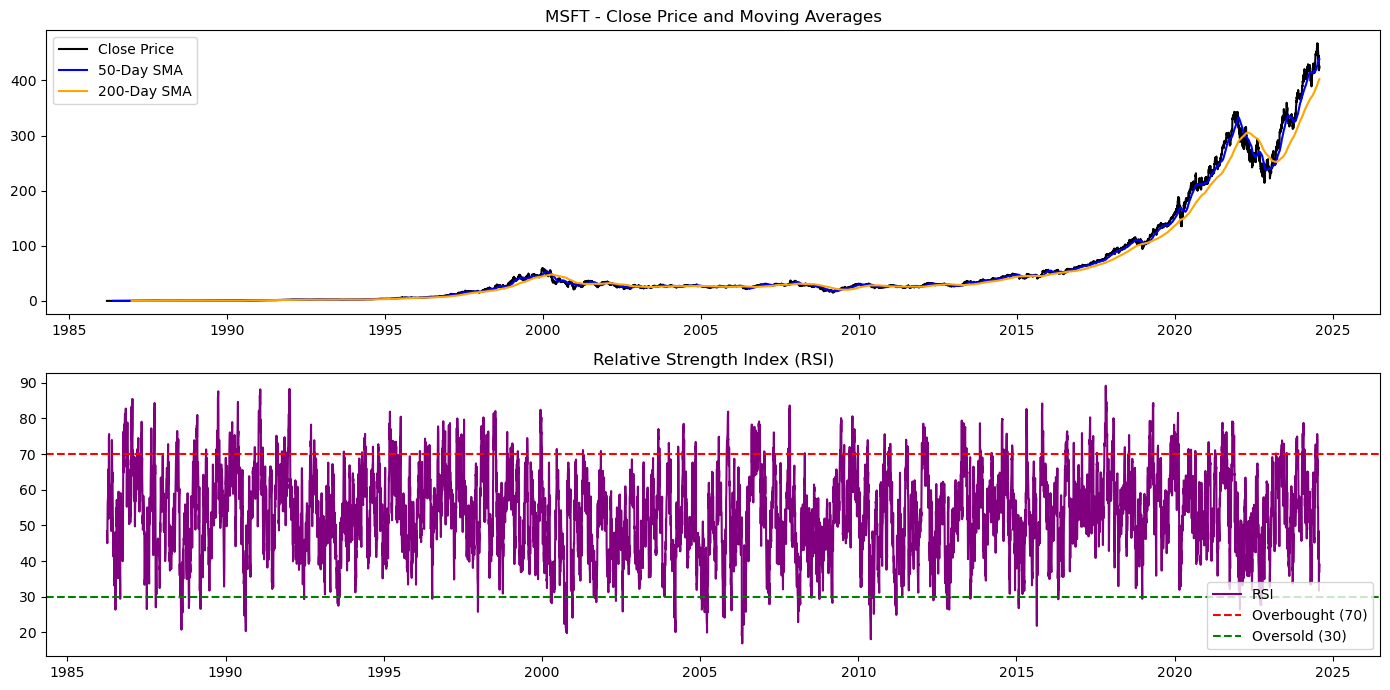

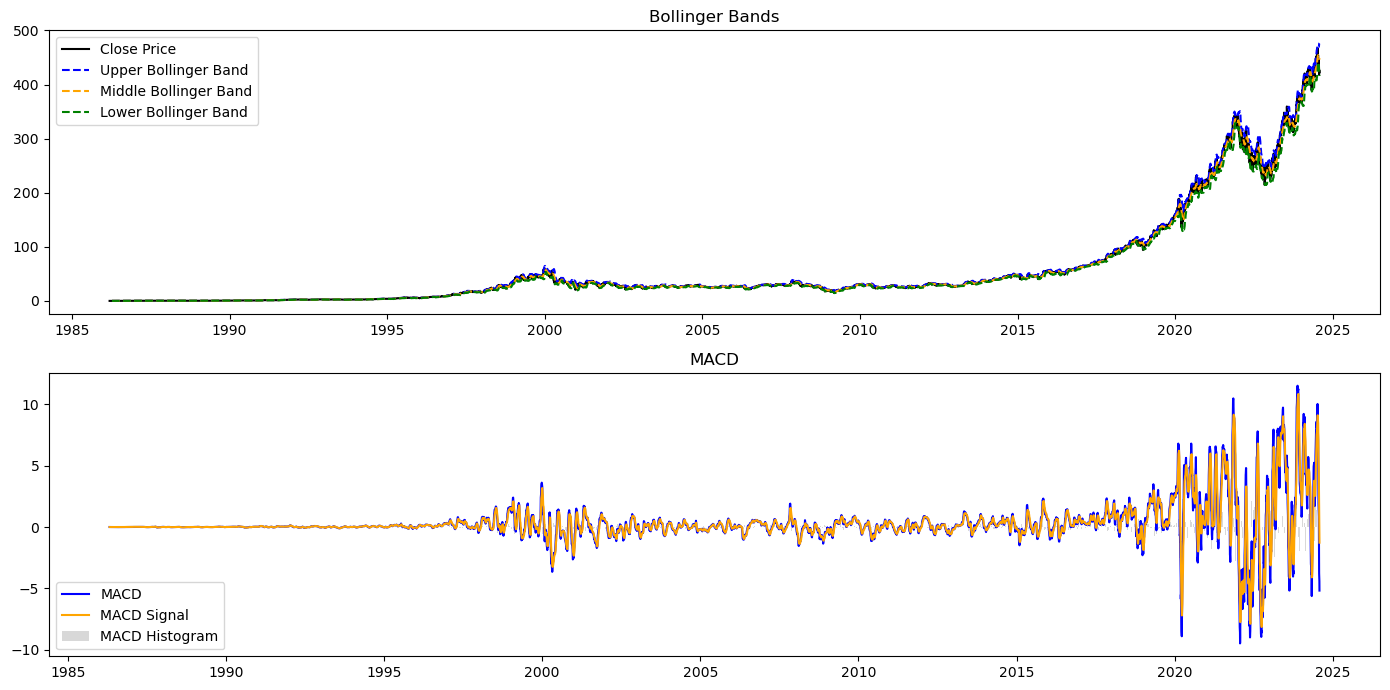

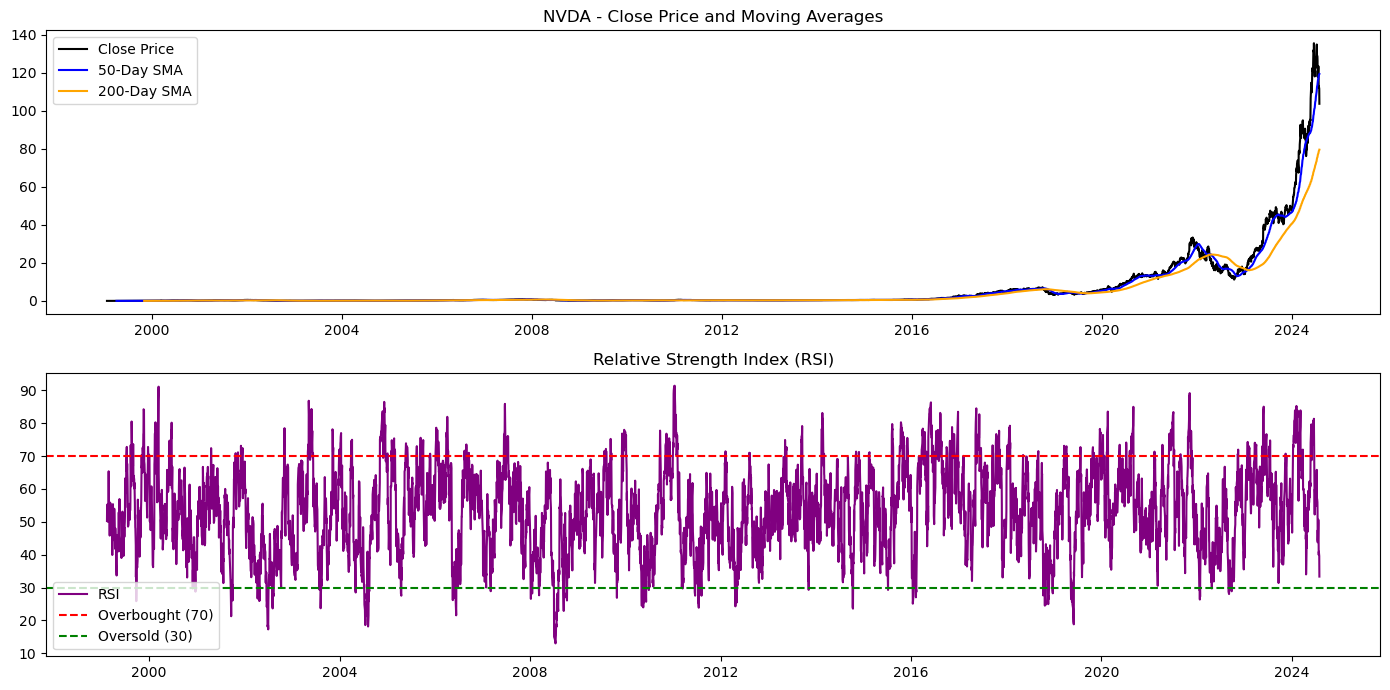

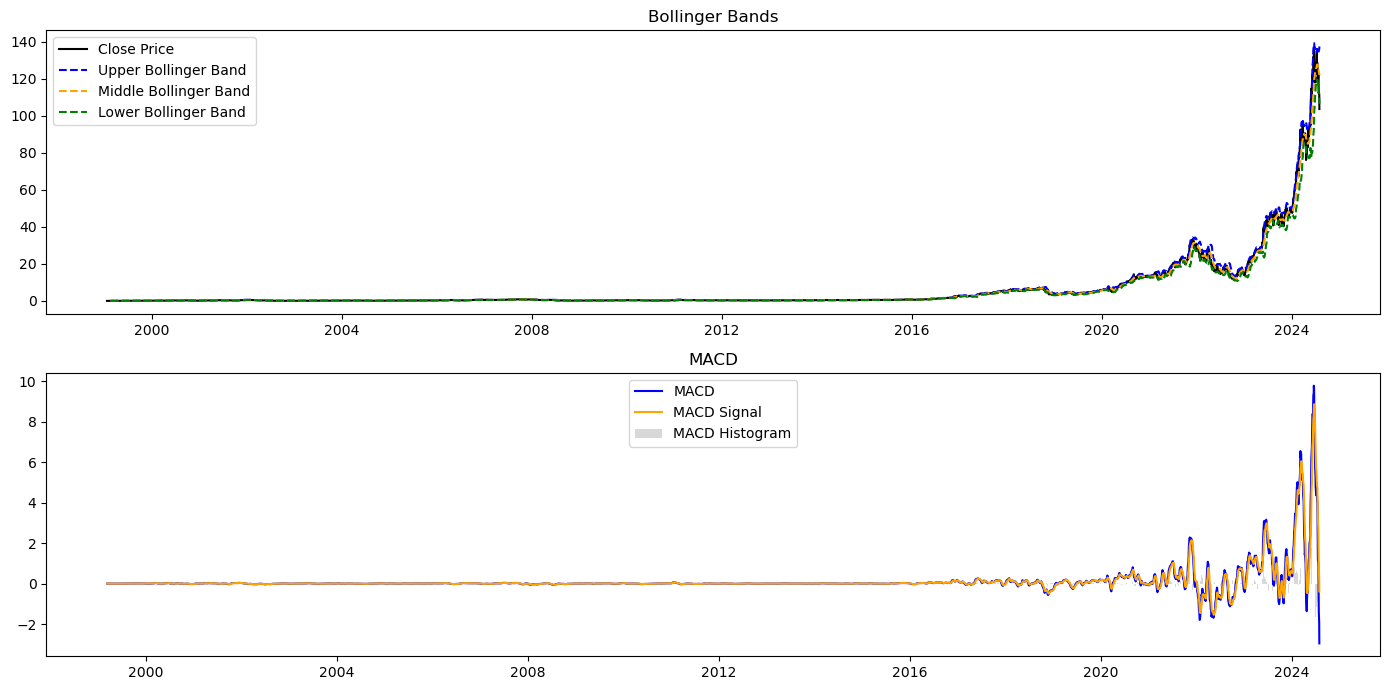

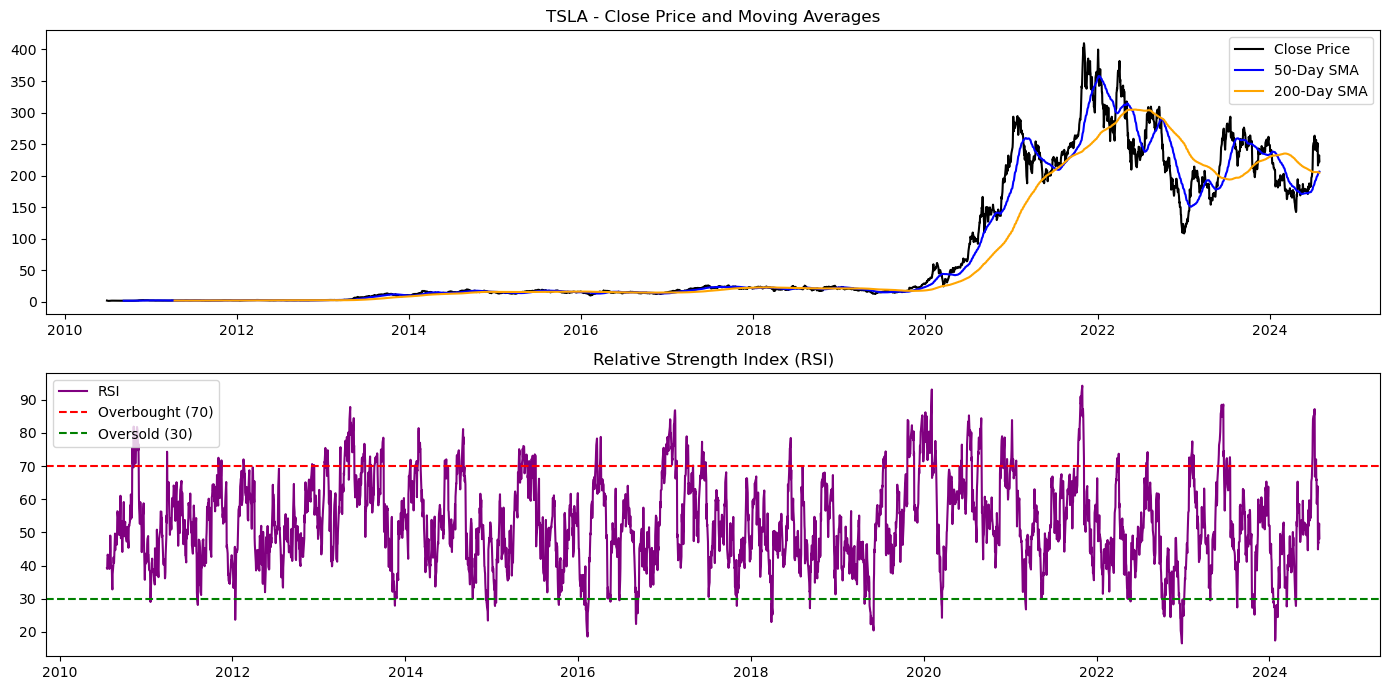

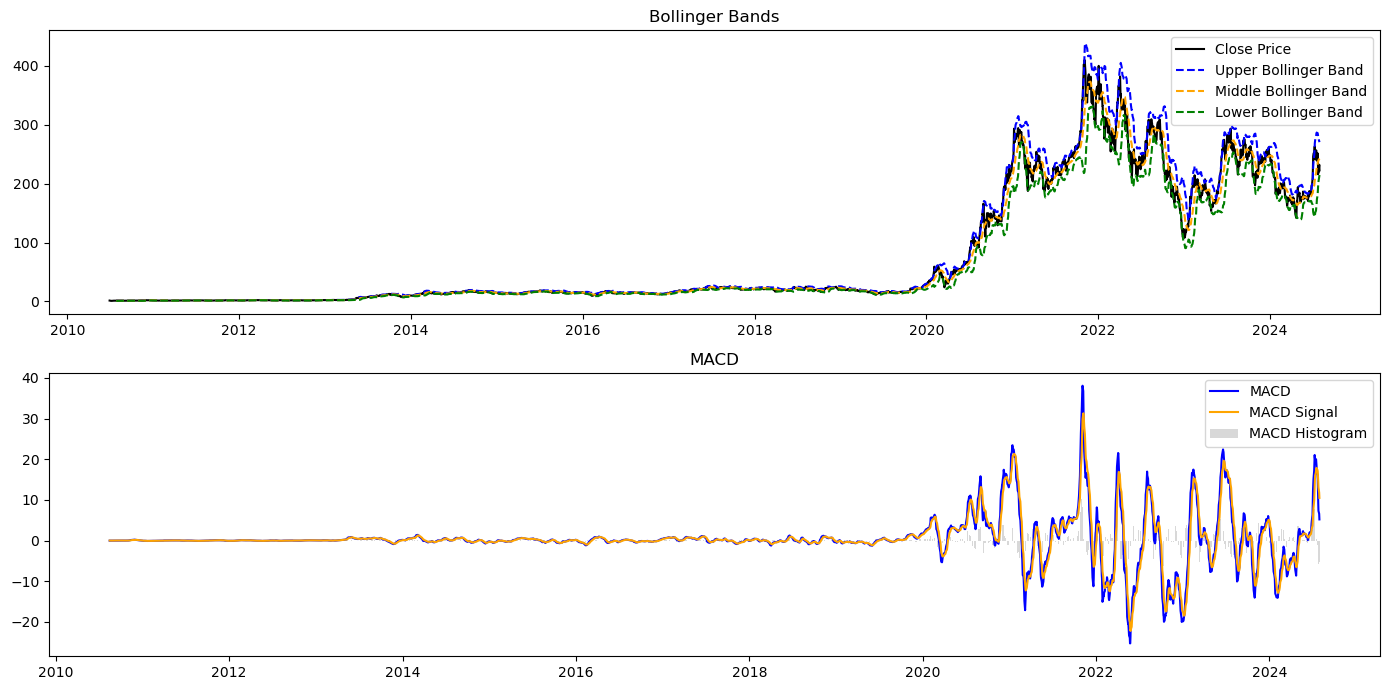

In [40]:
for file_name, df in dfs.items():
    df = calculate_indicators(df)
    stock_name = file_name.split('_')[0]  # Extract stock name from file name
    
    plot_indicators(df, stock_name)

In [41]:
def plot_bollinger_bands(df, stock_name):
    plt.figure(figsize=(10, 6))
    
    # Plot Close price with Bollinger Bands
    plt.plot(df['Close'], label=f'{stock_name} Close Price')
    plt.plot(df['UpperBand'], label='Upper Bollinger Band', linestyle='--')
    plt.plot(df['MiddleBand'], label='Middle Bollinger Band', linestyle='--')
    plt.plot(df['LowerBand'], label='Lower Bollinger Band', linestyle='--')
    
    plt.title(f'{stock_name} Bollinger Bands')
    plt.legend()
    plt.show()



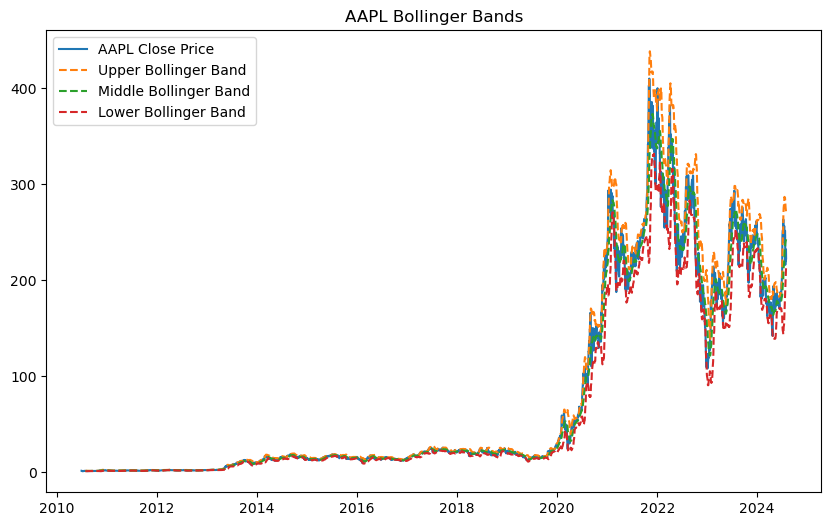

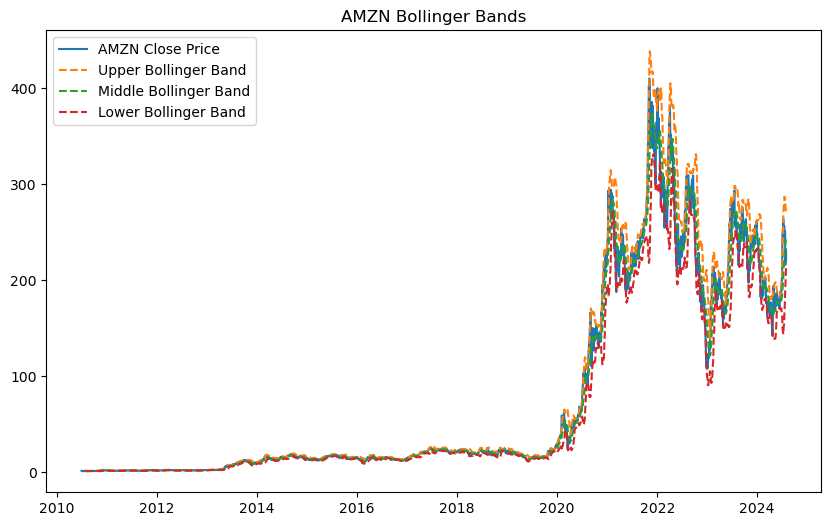

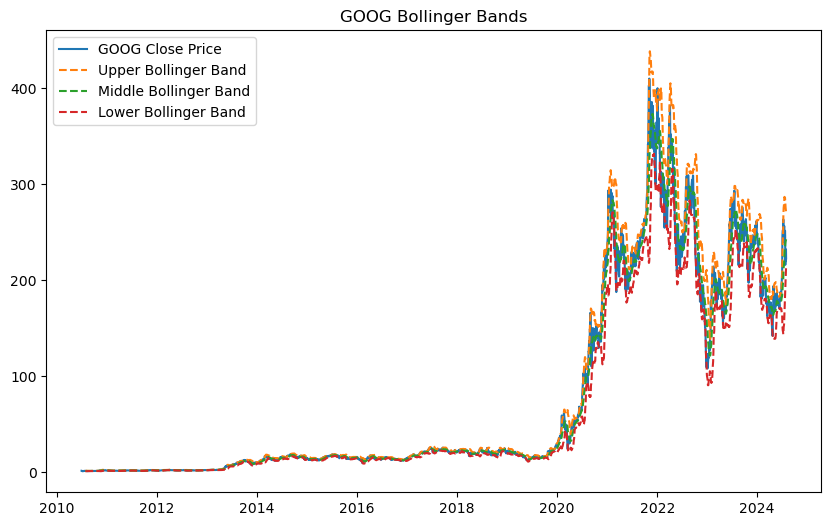

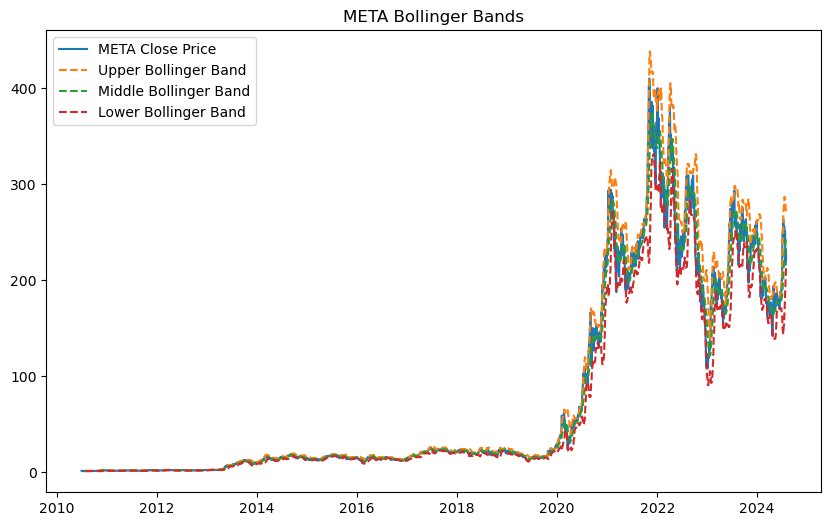

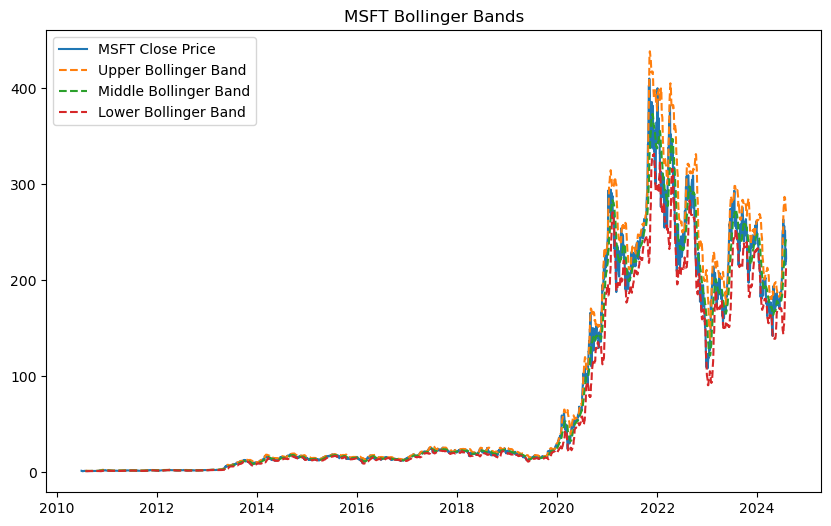

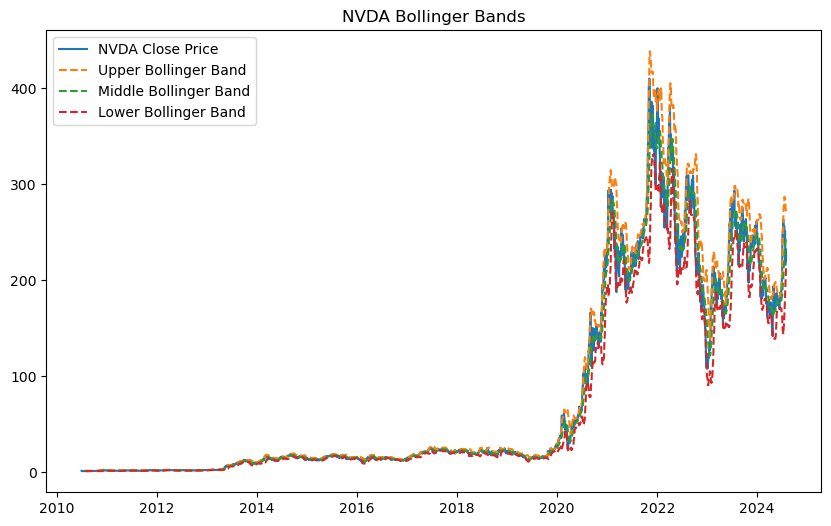

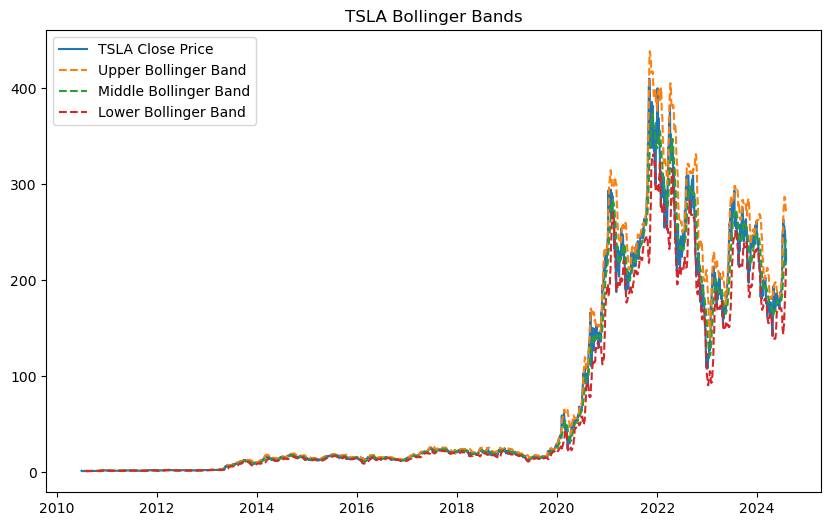

In [42]:
# plot Bollinger Bands for each stock
for file_name in csv_files:
    stock_name = file_name.split('_')[0]
    plot_bollinger_bands(df, stock_name)
